In [1]:
# imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

import imutils  # make basic image processing functions
import pytesseract # for reading text in images

In [20]:
# "C:\Users\2me41\AppData\Local\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = r'C:/Users/2me41/AppData/Local/Tesseract-OCR/tesseract.exe'


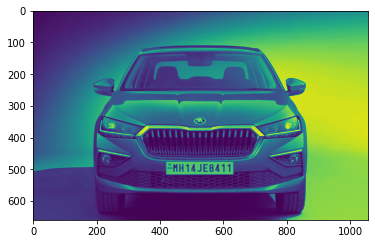

In [4]:
img = cv2.imread('C:/Users/2me41/Downloads/car-front-view.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

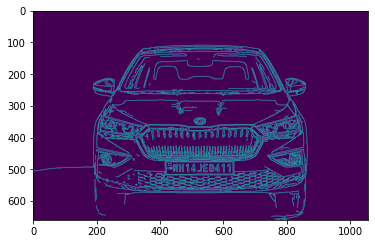

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 20, 30)
plt.imshow(edged)


In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = imutils.grab_contours(keypoints)
contour = sorted(contour, key=cv2.contourArea, reverse=True)[:10]


In [8]:
location = None
for cot in contour:
    approx = cv2.approxPolyDP(cot, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [9]:
location

array([[[419, 479]],

       [[424, 516]],

       [[630, 514]],

       [[629, 477]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)

new_img = cv2.drawContours(mask, [location], 0, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(new_img)

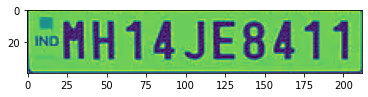

In [13]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

plt.imshow(cropped_img)

In [21]:
read = pytesseract.image_to_string(cropped_img)

In [24]:
read = ''.join(i for i in read if i.isalnum())

In [25]:
read

'MH14JE8411'